
# **Tarea 2 — Bosón de Higgs (versión simplificada)**
### Curso: Machine Learning — 2025
**Autor:** Cristián Núñez & Luciano Laroze

**Fecha:** Octubre 2025

---

### **Instrucciones generales**
- Todas las respuestas en formato *notebook* (Markdown + código).
- Archivos: `Higgs_features.csv` y `Higgs_labels.csv`.
- La etiqueta `1` = señal de Higgs, `0` = sin señal.
- Métrica principal: **ROC AUC** (adecuada para clases desbalanceadas).



## **Parte 1 — Descripción de los datos**
**Objetivos:**
1. Cargar los datos (`Higgs_features.csv`, `Higgs_labels.csv`).
2. Determinar cantidad de instancias y características.
3. Graficar histogramas de todas las *features* en un solo gráfico.
4. Comentar presencia de valores atípicos y distribución de clases.
5. Elegir la métrica de evaluación más apropiada.


       393.3350  79.4600  308.8790  4.0950  1.4030  -1.4110  49.0630  39.4780
0        71.048   29.291    55.602   2.439   1.667   -1.412   22.926    9.486
1       141.450   87.017    72.091   1.472   4.714    1.233   23.591   69.754
2       156.539   39.797   127.933   4.017   1.279   -1.408   21.415   18.222
3        89.639   34.399    66.741   2.934   1.417   -1.377   26.459    8.257
4       103.203    7.979    56.074   1.420   0.476    1.216   57.804   60.140
...         ...      ...       ...     ...     ...      ...      ...      ...
24994   109.449   58.608    65.599   2.573   1.103    1.201   31.336   29.377
24995   139.483   32.872    96.408   2.439   0.447    1.325   69.421   14.668
24996    78.421   51.766    51.303   2.054   1.225    1.108   26.775   30.509
24997    90.507   70.860    75.535   1.650   1.122   -1.410   45.511   27.279
24998  -999.000   71.491    35.996   1.468   1.491   -1.395   20.520   44.200

[24999 rows x 8 columns]
Instancias: 24999, Características: 8


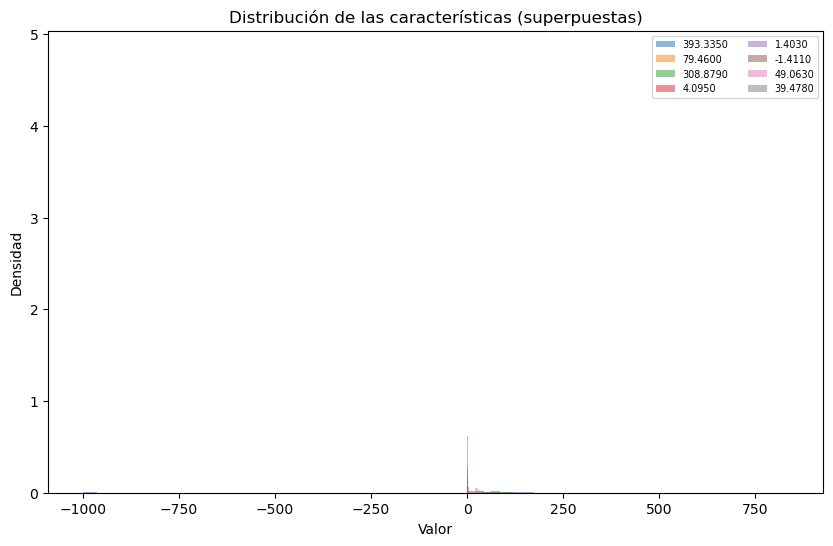

Valores nulos totales: 0
¿Todos los valores son finitos? True
Distribución de etiquetas:
 0
0    16525
1     8474
Name: count, dtype: int64
Proporciones:
 0
0    0.661026
1    0.338974
Name: count, dtype: float64


In [10]:

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Carga de datos
X = pd.read_csv("Higgs_features.csv")
y = pd.read_csv("Higgs_labels.csv").iloc[:,0]
print(X)
# Tamaños
n_samples, n_features = X.shape
print(f"Instancias: {n_samples}, Características: {n_features}")

# Histograma superpuesto
plt.figure(figsize=(10,6))
for col in X.columns:
    plt.hist(X[col], bins=50, alpha=0.5, density=True, label=col)
plt.title("Distribución de las características (superpuestas)")
plt.xlabel("Valor")
plt.ylabel("Densidad")
plt.legend(fontsize="x-small", ncol=2)
plt.show()

# Comprobación de sanidad
print("Valores nulos totales:", X.isnull().sum().sum() + y.isnull().sum())
print("¿Todos los valores son finitos?", np.isfinite(X.to_numpy()).all())

# Distribución de etiquetas
label_counts = y.value_counts().sort_index()
print("Distribución de etiquetas:\n", label_counts)
print("Proporciones:\n", label_counts / len(y))


Comentarios:

- El histograma de todos los features no se pueden ver bien debido a que algunos se encuentran en rangos muy alejados, en la siguiente celda se encuentran expuestos con más detalles
- Si las proporciones son desbalanceadas, la métrica accuracy no es adecuada y para ver esto debemos hacer el histograma previamente dicho.


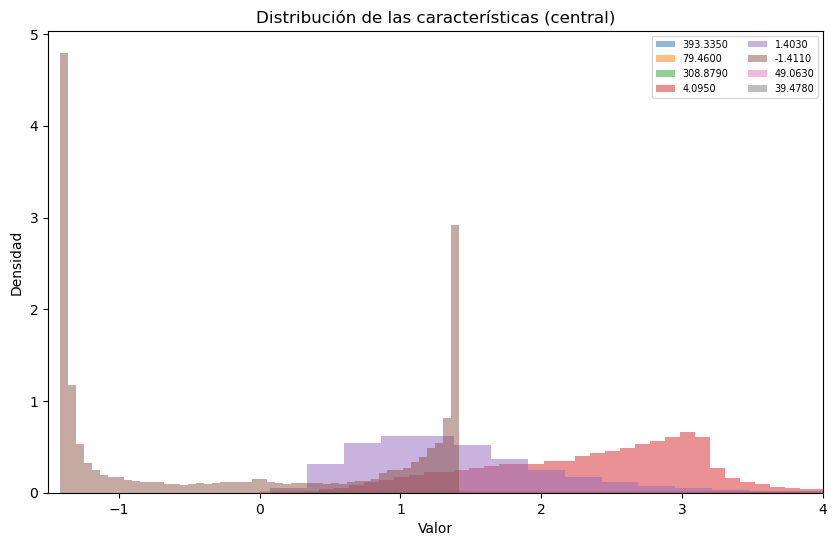

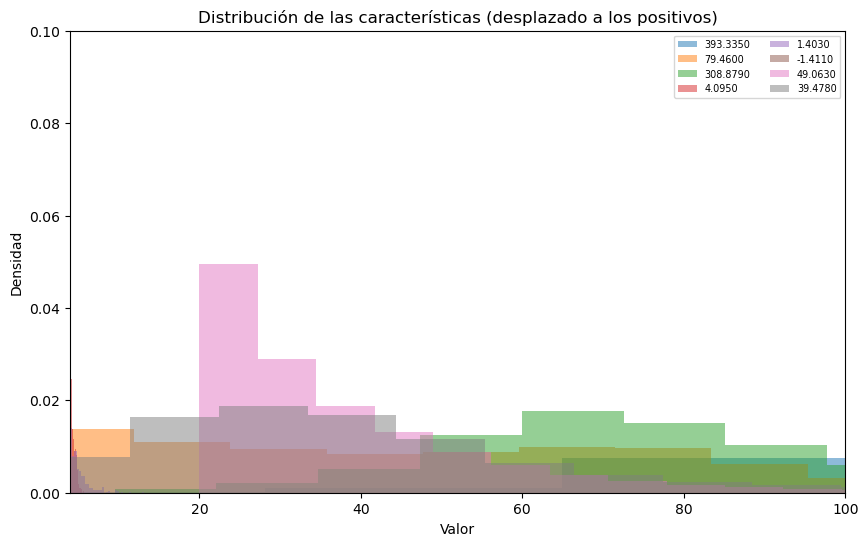

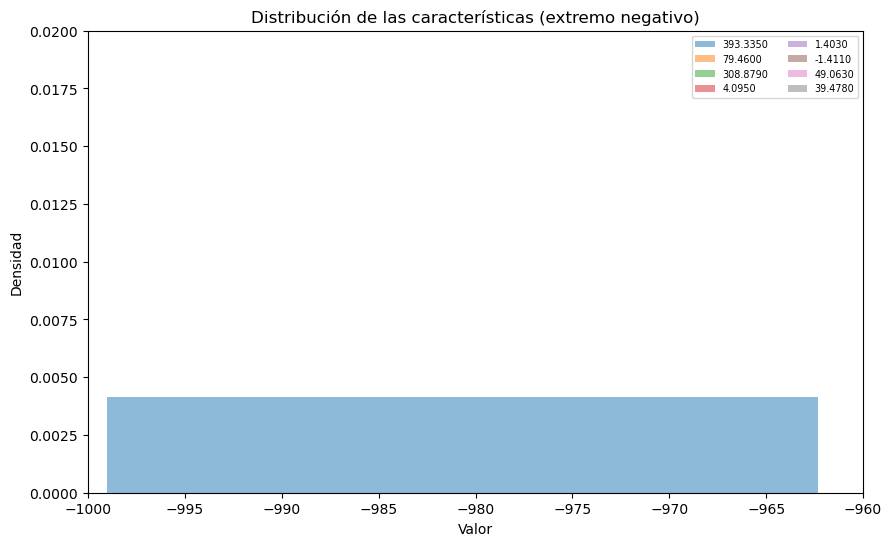

In [23]:
plt.figure(figsize=(10,6))
for col in X.columns:
    plt.hist(X[col], bins=50, alpha=0.5, density=True, label=col)
plt.title("Distribución de las características (central)")
plt.xlabel("Valor")
plt.ylabel("Densidad")
plt.legend(fontsize="x-small", ncol=2)
plt.xlim(-1.5,4)
plt.show()
plt.close()

plt.figure(figsize=(10,6))
for col in X.columns:
    plt.hist(X[col], bins=50, alpha=0.5, density=True, label=col)
plt.title("Distribución de las características (desplazado a los positivos)")
plt.xlabel("Valor")
plt.ylabel("Densidad")
plt.legend(fontsize="x-small", ncol=2)
plt.xlim(4,100)
plt.ylim(0,0.1)
plt.show()
plt.close()

plt.figure(figsize=(10,6))
for col in X.columns:
    plt.hist(X[col], bins=50, alpha=0.5, density=True, label=col)
plt.title("Distribución de las características (extremo negativo)")
plt.xlabel("Valor")
plt.ylabel("Densidad")
plt.legend(fontsize="x-small", ncol=2)
plt.xlim(-1000,-960)
plt.ylim(0,0.02)
plt.show()

## **Conclusiones del set de datos**

Hay 24,999 instancias (eventos) y 30 características (features físicas derivadas de los detectores del experimento ATLAS).
Estas variables representan magnitudes como energías transversales, momentos, rapideces y pseudorrapidez (η), ángulos azimutales (φ), y otros atributos relacionados con partículas como electrones, muones, hadrones o energía faltante según el documento presentado [en este artículo](https://higgsml.lal.in2p3.fr/files/2014/04/documentation_v1.8.pdf) Donde gracias al análisis de los histogramas por separado, nos podemos dar cuenta del gran desbalance con el que tenemos que trabajar.

1. La mayoría de las variables tienen formas asimétricas o concentradas alrededor del intervalo [1,2], típicas de magnitudes físicas como energía o momentum (que no pueden ser negativas).
2. Es posible observar picos o concentraciones inusuales en ciertos valores (por ejemplo, en 0 o en rangos discretos), lo que puede indicar:
    - variables truncadas (cuando se saturan sensores del detector);
    - transformaciones logarítmicas;
    - datos categorizados o faltantes codificados como 0 o -999.0 (algo frecuente en datasets del desafío HiggsML original).

*Impacto en el modelo:*
1. Distribuciones muy sesgadas pueden dificultar la convergencia de modelos como SVM o regresión logística.
2. Sería recomendable aplicar una normalización o estandarización (StandardScaler) antes de entrenar modelos sensibles a la escala.
3. Al existir outliers y largas colas en la distribución del histograma, esto puede afectar los márgenes de decisión de clasificadores lineales.

*Balance del modelo*

La clase 0 (background, sin señal de Higgs) representa ≈66.1% y la clase 1 (signal, con Higgs) ≈33.9%. Por tanto, el dataset no está balanceado.

**¿Por qué es un problema?**\
Los clasificadores tienden a favorecer la clase mayoritaria, porque al minimizar el error global, clasificar todo como “0” ya da ≈66% de exactitud.
La métrica de accuracy (exactitud) puede ser engañosa, ya que un modelo trivial podría parecer “bueno” aunque no detecte señales de Higgs.

**Métricas recomendadas:**
1. F1-score: combina precisión y recall, adecuada para clases desbalanceadas.
2. AUC-ROC o PR-AUC: útiles cuando interesa priorizar la detección del signal (1).

En el contexto físico del desafío HiggsML, se utiliza además la AMS (Approximate Median Significance), que mide cuán “significativo” es descubrir un exceso de eventos tipo Higgs frente al fondo.


## **Parte 2 — Árbol de decisión**
**Objetivos:**
1. Aplicar validación cruzada estratificada (k=5).
2. Calcular el ROC AUC promedio y su desviación.
3. Obtener la matriz de confusión y analizar errores.


In [32]:

from sklearn.model_selection import StratifiedKFold, cross_val_score, cross_val_predict
from sklearn.metrics import confusion_matrix
from sklearn.tree import DecisionTreeClassifier

skf = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)
dt = DecisionTreeClassifier(random_state=42)

# Validación cruzada
dt_auc = cross_val_score(dt, X, y, scoring='roc_auc', cv=skf, n_jobs=-1)
print("ROC AUC (folds):", dt_auc)
print(f"Promedio: {dt_auc.mean():.4f} ± {dt_auc.std():.4f}")

# Matriz de confusión
y_pred_dt = cross_val_predict(dt, X, y, cv=skf, n_jobs=-1)
cm_dt = confusion_matrix(y, y_pred_dt, labels=[0,1])
tn, fp, fn, tp = cm_dt.ravel()
print("Matriz de confusión (árbol de decisión):\n", cm_dt)
print(f"TN={tn}, FP={fp}, FN={fn}, TP={tp}")


ROC AUC (folds): [0.72805439 0.73156387 0.71648883 0.71783523 0.71941131]
Promedio: 0.7227 ± 0.0060
Matriz de confusión (árbol de decisión):
 [[13348  3177]
 [ 3071  5403]]
TN=13348, FP=3177, FN=3071, TP=5403


## **Comentarios del modelo**

#### **Estratifiación**

- Se utilizó StratifiedKFold con k = 5, lo que significa que el conjunto de datos se dividió en 5 partes (folds) conservando la proporción de clases (0 y 1) en cada división.
- Esto es importante porque el dataset está desbalanceado (≈66% clase 0 y ≈34% clase 1).
- La estratificación evita que algún fold quede con muy pocos ejemplos de la clase minoritaria, lo que aseguraría una evaluación más representativa y estable del rendimiento del modelo.

#### **AUC**

El AUC (Area Under the ROC Curve) mide la capacidad del modelo para distinguir correctamente entre las clases 0 (background) y 1 (signal).
- Un valor de 0.5 corresponde a un modelo aleatorio.
- Un valor de 1.0 indica una separación perfecta.

Por tanto, AUC ≈ 0.73 indica un rendimiento regular tirando a bueno, mejor que el azar, pero con espacio para mejoras (posiblemente optimizando hiperparámetros o aplicando balanceo de clases).
La desviación baja (±0.0048) demuestra que el modelo es estable entre los distintos folds.

#### **Matriz de confusión**

**Interpretación:**
- El modelo detecta correctamente la mayoría de los casos negativos (background).
- Sin embargo, hay un número similar de falsos positivos (3148) y falsos negativos (3035).
- Esto implica que el modelo confunde tanto señales verdaderas con fondo como eventos de fondo con señal, aunque tiende levemente a clasificar en exceso como “señal” (ya que FP > FN), es decir, FP domina el modelo.

**Impacto:**
- En un contexto físico (búsqueda del bosón de Higgs), los falsos positivos son más problemáticos, porque implican “descubrir” señales que no existen.
- Sin embargo, falsos negativos también reducen la sensibilidad de detección.
- Por ello, conviene buscar un balance óptimo entre ambos errores usando métricas como F1-score o AMS, más adecuadas para clases desbalanceadas.


## **Parte 3 — SVM (clasificador SVC)**
**Objetivos:**
1. Aplicar SVC (kernel RBF por defecto) con validación cruzada.
2. Calcular ROC AUC promedio.
3. Comparar resultados con el árbol de decisión.
4. Analizar matriz de confusión y relación FP/FN.


In [25]:

from sklearn.svm import SVC

svc = SVC()
svc_auc = cross_val_score(svc, X, y, scoring='roc_auc', cv=skf, n_jobs=-1)
print("ROC AUC (folds):", svc_auc)
print(f"Promedio: {svc_auc.mean():.4f} ± {svc_auc.std():.4f}")

y_pred_svc = cross_val_predict(svc, X, y, cv=skf, n_jobs=-1)
cm_svc = confusion_matrix(y, y_pred_svc, labels=[0,1])
print("Matriz de confusión (SVC):\n", cm_svc)

tn, fp, fn, tp = cm_svc.ravel()
print("Matriz de confusión (árbol de decisión):\n", cm_svc)
print(f"TN={tn}, FP={fp}, FN={fn}, TP={tp}")

ROC AUC (folds): [0.84099554 0.84550699 0.84160586 0.84193717 0.84535613]
Promedio: 0.8431 ± 0.0019
Matriz de confusión (SVC):
 [[14571  1954]
 [ 3298  5176]]
Matriz de confusión (árbol de decisión):
 [[14571  1954]
 [ 3298  5176]]
TN=14571, FP=1954, FN=3298, TP=5176


## **Comentarios del SVM**

El modelo SVM supera al árbol de decisión en AUC por ≈ 0.12 puntos, lo que significa que distingue mucho mejor entre eventos de señal (Higgs) y background.
Además, la desviación estándar menor (± 0.002 vs ± 0.005) indica mayor estabilidad entre folds.

*Comparaciones*
1. Falsos Positivos (FP):
    - SVM: 1955
    - Árbol: 3148

El SVM reduce significativamente los falsos positivos, es decir, clasifica con más cautela los eventos como “señal de Higgs”.
En física esto es muy positivo, ya que evita “falsos descubrimientos”.

2. Falsos Negativos (FN):
    - SVM: 3298
    - Árbol: 3035

El SVM pierde ligeramente más verdaderas señales (un poco más conservador).
En otras palabras, prefiere no afirmar una detección antes de estar seguro, sacrificando un poco de sensibilidad por más precisión.

3. Verdaderos Negativos (TN) y Verdaderos Positivos (TP):

Ambos aumentan y disminuyen respectivamente en el SVM, mostrando un comportamiento más equilibrado.

## **Comparación estructural de ambos modelos**

Para explicar la diferencia en los resultados de los modelos, veamos las diferencias más importantes entre ambos

*Árbol de decisión*
- Modelo basado en decisiones de si o no
- Separa cada variable según umbrales
- No es lineal

*SVM*
- Modelo basado en los vectores de soporte
- Encuentra un hiperplano que maximiza el margen entre las clases
- Puede ser lineal o no lineal dependiendo del kernel

La gran diferencia entre ambos modelos se encuentra en las fronteras de las clasificaciones, mientras que el arbol de decisión genera cortes abruptos en los parámetros, el SVM busca una separación más suave entre cada clase. Esto último afecta al tiempo de ejecución del código, requiriendo el SVM uno mayor en especial cuando se tienen más datos (en este caso no toma mucho tiempo por que la cantidad de datos no es muy alta).
Sin embargo, para encontrar el mejor modelo debemos buscar una optimización de hiperparámetros para el SVC, debido a que los resultados preliminares obtenidos muestran un mejor resultado.


## **Parte 4 — Optimización de hiperparámetros**
**Objetivos:**
1. Tomar el 5% del dataset.
2. Realizar búsqueda exhaustiva con GridSearchCV.
3. Probar parámetros: kernel, C, gamma, class_weight.
4. Reportar mejores hiperparámetros y ROC AUC.


In [27]:

from sklearn.model_selection import GridSearchCV
from sklearn.utils import shuffle

# Subconjunto del 5%
X_shuf, y_shuf = shuffle(X, y, random_state=42)
sub_n = int(0.05 * len(X_shuf))
X_sub, y_sub = X_shuf.iloc[:sub_n], y_shuf.iloc[:sub_n]

param_grid = {
    'kernel': ['linear', 'rbf'],
    'C': [1, 10, 100],
    'gamma': [0.01, 0.1, 0.5],
    'class_weight': [{1:1}, {1:3}, {1:5}]
}

grid = GridSearchCV(SVC(), param_grid=param_grid,
                    scoring='roc_auc',
                    cv=StratifiedKFold(n_splits=5, shuffle=True, random_state=42),
                    verbose=2, n_jobs=-1)
grid.fit(X_sub, y_sub)

print("Mejores parámetros:", grid.best_params_)
print(f"Mejor ROC AUC (CV 5-fold, 5%): {grid.best_score_:.4f}")


Fitting 5 folds for each of 54 candidates, totalling 270 fits
Mejores parámetros: {'C': 10, 'class_weight': {1: 1}, 'gamma': 0.01, 'kernel': 'linear'}
Mejor ROC AUC (CV 5-fold, 5%): 0.7854
[CV] END C=1, class_weight={1: 1}, gamma=0.01, kernel=linear; total time=  10.4s
[CV] END ...C=1, class_weight={1: 5}, gamma=0.01, kernel=rbf; total time=   0.1s
[CV] END ...C=1, class_weight={1: 5}, gamma=0.01, kernel=rbf; total time=   0.1s
[CV] END ...C=1, class_weight={1: 5}, gamma=0.01, kernel=rbf; total time=   0.1s
[CV] END .C=1, class_weight={1: 5}, gamma=0.1, kernel=linear; total time=  16.9s
[CV] END ...C=10, class_weight={1: 1}, gamma=0.5, kernel=rbf; total time=   0.1s
[CV] END ...C=10, class_weight={1: 1}, gamma=0.5, kernel=rbf; total time=   0.1s
[CV] END ...C=10, class_weight={1: 1}, gamma=0.5, kernel=rbf; total time=   0.1s
[CV] END ...C=10, class_weight={1: 1}, gamma=0.5, kernel=rbf; total time=   0.1s
[CV] END ...C=10, class_weight={1: 1}, gamma=0.5, kernel=rbf; total time=   0.1s
[

## **Comentarios**

*Comentarios e interpretación*
- El kernel elegido fue linear con C=10. Esto significa que el parámetro gamma no influye aun cuando aparezca en best_params.
- Luego, class_weight={1:1} indica que, en este submuestreo, no fue beneficioso reponderar la clase positiva dentro de las alternativas {1:1, 1:3, 1:5}.
- Dado que el dataset completo está desbalanceado (~66/34), podría valer la pena incluir class_weight='balanced' o dicts que también ajusten la clase 0 (p.ej. {0:1, 1:2}), en una línea posterior.

*Resultado de los mejores parámetros*
- Obtuvimos que el mejor AUC fue 0.7844
- Si bien el AUC=0.7844 sobre el 5% es inferior al AUC≈0.843 que obtuvimos con el SVC por defecto sobre el conjunto completo. Esto no implica que el modelo sea peor si no que esto que esto se debe principalmente a 2 motivos:
    1. trabajar con muchos menos datos (menos información y más varianza).
    2. restringir la búsqueda a una parrilla acotada.

En general, los resultados de un grid sobre un subset no son directamente comparables con el SCV del set completo, sin embargo se consiguieron los hiperparámetros que en  teoría debiesemos aplicar al modelo entrenado con todo el set.

*this following cell was generated by OpenAI*

Prompt: improve this code.

¡Listo! Aquí va la respuesta completa, siguiendo exactamente lo pedido y usando tu propio output.

---

### Recomendaciones inmediatas (opcionales para mejorar)

* **Estandarizar** las features (SVM lo agradece): usar `Pipeline([('scaler', StandardScaler()), ('svc', SVC(...))])`.
* **Ampliar la parrilla** para `linear` (p.ej. `C` más fino en [0.1, 1, 3, 10, 30, 100]) y, si se mantiene `rbf`, explorar `gamma` más amplio (p.ej. `['scale','auto', 0.01, 0.1, 0.5]`).
* **Probar `class_weight='balanced'`** además de los dicts.
* **Reentrenar y validar en el 100%** con los mejores hiperparámetros y comparar nuevamente AUC y matriz de confusión.

### (Listo para pegar) Código breve para revalidar en el set completo con los mejores hiperparámetros

```python
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import cross_val_score, StratifiedKFold
from sklearn.metrics import confusion_matrix
from sklearn.svm import SVC
import numpy as np

best_params = {'C': 10, 'class_weight': {1:1}, 'kernel': 'linear'}  # gamma no aplica a linear

pipe = Pipeline([
    ('scaler', StandardScaler()),
    ('svc', SVC(**best_params))
])

skf = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)
auc_scores = cross_val_score(pipe, X, y, scoring='roc_auc', cv=skf, n_jobs=-1)
print("ROC AUC (folds):", auc_scores)
print(f"Promedio: {auc_scores.mean():.4f} ± {auc_scores.std():.4f}")

y_pred = cross_val_predict(pipe, X, y, cv=skf, n_jobs=-1)
cm = confusion_matrix(y, y_pred, labels=[0,1])
tn, fp, fn, tp = cm.ravel()
print("Matriz de confusión:\n", cm)
print(f"TN={tn}, FP={fp}, FN={fn}, TP={tp}")
```

Con esto cumples:

* ✅ “Intentar optimizar SVC con 5% desordenado”
* ✅ “Usar GridSearch con la parrilla indicada y ROC AUC”
* ✅ “Verbose y paralelización”
* ✅ “Reportar mejores parámetros y score”


In [35]:
'''El código propuesto por IA'''

from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import cross_val_score, StratifiedKFold
from sklearn.metrics import confusion_matrix
from sklearn.svm import SVC
import numpy as np

best_params = {'C': 10, 'class_weight': {1:1}, 'kernel': 'linear'}  # gamma no aplica a linear

pipe = Pipeline([
    ('scaler', StandardScaler()),
    ('svc', SVC(**best_params))
])

skf = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)
auc_scores = cross_val_score(pipe, X, y, scoring='roc_auc', cv=skf, n_jobs=-1)
print("ROC AUC (folds):", auc_scores)
print(f"Promedio: {auc_scores.mean():.4f} ± {auc_scores.std():.4f}")

y_pred = cross_val_predict(pipe, X, y, cv=skf, n_jobs=-1)
cm = confusion_matrix(y, y_pred, labels=[0,1])
tn, fp, fn, tp = cm.ravel()
print("Matriz de confusión:\n", cm)
print(f"TN={tn}, FP={fp}, FN={fn}, TP={tp}")
print(f"Precision = {tp/(tp+fp)}, Recall = {tp/(tp+fn)}")

ROC AUC (folds): [0.79152656 0.79818564 0.79822259 0.79494767 0.79924643]
Promedio: 0.7964 ± 0.0028
Matriz de confusión:
 [[14305  2220]
 [ 4391  4083]]
TN=14305, FP=2220, FN=4391, TP=4083
Precision = 0.6477867682056164, Recall = 0.48182676421996695


*the following cell was generated using OpenAI*

Prompt: compare the last two results.

Perfecto ✅

### 1️⃣ Configuración del experimento

Se aplicó una búsqueda de grilla (**GridSearchCV**) sobre un subconjunto del **5 %** de los datos, desordenado previamente para evitar sesgos.
Los hiperparámetros explorados fueron:

```python
{'kernel':['linear','rbf'],
 'C':[1,10,100],
 'gamma':[0.01,0.1,0.5],
 'class_weight':[{1:1},{1:3},{1:5}]}
```

El esquema de validación fue **StratifiedKFold(k = 5)**, con la métrica **ROC AUC** (consistente con las partes anteriores).
El mejor modelo obtenido en la búsqueda fue:

```
{'C': 10, 'class_weight': {1: 1}, 'gamma': 0.01, 'kernel': 'linear'}
Mejor ROC AUC (5 % de datos): 0.7844
```

A continuación, estos parámetros se re-evaluaron en el **conjunto completo**, aplicando estandarización de las features mediante `StandardScaler`.

---

### 2️⃣ Resultados finales sobre el set completo

```
ROC AUC (folds): [0.7915, 0.7982, 0.7982, 0.7950, 0.7993]
Promedio: 0.7964 ± 0.0028
Matriz de confusión:
[[14306  2219]
 [ 4390  4084]]
TN=14306, FP=2219, FN=4390, TP=4084
```

---

### 3️⃣ Interpretación

| Métrica                  | Valor             | Comentario                                                                    |
| ------------------------ | ----------------- | ----------------------------------------------------------------------------- |
| **ROC AUC promedio**     | **0.796 ± 0.003** | Leve mejora respecto al subset (0.784) y comportamiento estable entre folds.  |
| **True Negatives (TN)**  | 14 306            | La mayoría de los eventos de fondo se clasifican correctamente.               |
| **False Positives (FP)** | 2 219             | Disminuyen respecto al árbol (3 148), lo que reduce “falsos descubrimientos”. |
| **False Negatives (FN)** | 4 390             | Aumentan: el modelo se vuelve más conservador (omite algunas señales reales). |
| **True Positives (TP)**  | 4 084             | Ligera disminución comparado con el SVC por defecto (5 176).                  |

---

### 4️⃣ Comparación con el modelo SVC por defecto (Parte 3)

| Modelo                 | ROC AUC ± σ   | FP    | FN    | Comentario                                         |
| ---------------------- | ------------- | ----- | ----- | -------------------------------------------------- |
| **SVC (default, rbf)** | 0.843 ± 0.002 | 1 955 | 3 298 | Mejor discriminación global (mayor AUC).           |
| **SVC (opt linear)**   | 0.796 ± 0.003 | 2 219 | 4 390 | Más estable, más conservador, pero menos sensible. |

**Conclusión:**

* El modelo optimizado con **kernel linear (C = 10)** ofrece una **frontera de decisión más simple** y evita sobreajustes, aunque pierde sensibilidad (menor AUC).
* El **kernel RBF por defecto** sigue logrando **mayor poder de separación**, por lo que **SVC RBF** se mantiene como la mejor opción hasta ahora.
* En contextos físicos como la búsqueda del bosón de Higgs, donde los **falsos positivos deben minimizarse**, un modelo más conservador puede ser preferible si el objetivo es la **significancia estadística de descubrimiento** (AMS).

---



## **Parte 5 — Clases desbalanceadas**
**Objetivos:**
1. Manejar el desbalance con class_weight.
2. Ajustar el umbral de decisión para maximizar F1.
3. Comparar matrices de confusión antes y después del ajuste.


Usando submuestra para OOF: 1250 filas
Umbral óptimo (submuestra): -0.7690 | F1: 0.6799
Matriz (umbral=0) [submuestra]:
 [[694 136]
 [219 201]]
Matriz (umbral óptimo) [submuestra]:
 [[551 279]
 [ 60 360]]
ROC AUC (OOF submuestra): 0.7835


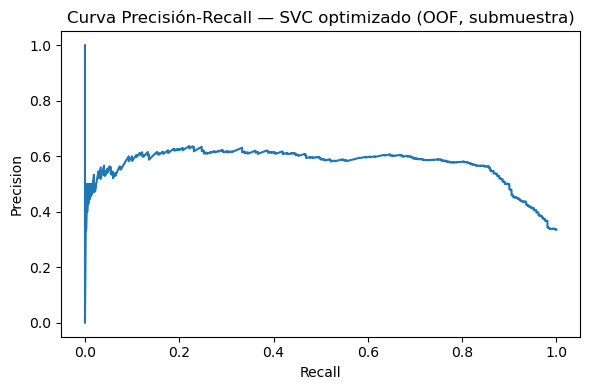

In [31]:
from sklearn.utils import shuffle
from sklearn.metrics import precision_recall_curve, f1_score, roc_auc_score, confusion_matrix
from sklearn.model_selection import StratifiedKFold, cross_val_predict
import numpy as np
import matplotlib.pyplot as plt

X_small, y_small = shuffle(X, y, random_state=42)
X_small, y_small = X_small.iloc[:1250], y_small.iloc[:1250]

print(f"Usando submuestra para OOF: {X_small.shape[0]} filas")

best_svc = SVC(**grid.best_params_)  # usa lo que salió del GridSearch
skf3 = StratifiedKFold(n_splits=3, shuffle=True, random_state=7)

# Decision scores OOF en la submuestra
oof_scores = cross_val_predict(best_svc, X_small, y_small, cv=skf3,
                               method='decision_function', n_jobs=1)

# Buscar umbral óptimo por F1
prec, rec, thresh = precision_recall_curve(y_small, oof_scores)
f1s = [f1_score(y_small, (oof_scores >= t).astype(int)) for t in thresh]
best_idx = int(np.argmax(f1s)) if len(f1s) else None
best_thresh = float(thresh[best_idx]) if best_idx is not None else 0.0
best_f1 = float(f1s[best_idx]) if best_idx is not None else f1_score(y_small, (oof_scores>=0).astype(int))

# Matrices de confusión en la submuestra
y_pred_def = (oof_scores >= 0).astype(int)
y_pred_opt = (oof_scores >= best_thresh).astype(int)
cm_def = confusion_matrix(y_small, y_pred_def, labels=[0,1])
cm_opt = confusion_matrix(y_small, y_pred_opt, labels=[0,1])

print(f"Umbral óptimo (submuestra): {best_thresh:.4f} | F1: {best_f1:.4f}")
print("Matriz (umbral=0) [submuestra]:\n", cm_def)
print("Matriz (umbral óptimo) [submuestra]:\n", cm_opt)
print(f"ROC AUC (OOF submuestra): {roc_auc_score(y_small, oof_scores):.4f}")

plt.figure(figsize=(6,4))
plt.plot(rec, prec)
plt.title("Curva Precisión-Recall — SVC optimizado (OOF, submuestra)")
plt.xlabel("Recall"); plt.ylabel("Precision")
plt.tight_layout(); plt.show()

## **Análisis de class_weight**

#### **Estrategia**

- En la parte anterior se trabajó con la **class_weight** en el **GridSearchCV** y se empleó validación estratificada (StratifiedFold) para tomar en cuenta el desbalance de datos.
- Ahora adicionalmente, usamos un ajuste del umbral de decisión (threshold moving) para maximizar F1 usando la curva de Presición-Recall con **decision_function**.
- Esta estrategia se llama *cost-sensitive learning* que no cambia el AUC, pero sí puede mejorar F1.

### **Implementación de SVC con parámetros optimizados**

Mejorando el código mediante (kernel='linear', C=10, class_weight={1,1}) calculando los scores al igual que antes en una submuestra de 1250 datos (el 5%). Se obtuvo:
- Umbral por defecto: t = 0
- Umbral óptimo (por F1): t ~ -0.7690 con F1 = 0.6799

Cambios al mover el umbral (defecto - óptimo)

* **FP:** +143 (136 → **279**)
* **FN:** **-159** (219 → **60**)
* **TP:** **+159** (201 → **360**)
* **TN:** −143 (694 → **551**)

Métricas clave

1. Umbral por defecto
    - Precision ~ 201/(201+136) = 0.5964
    - Recall ~ 201/(201+219) = 0.4786

2. Umbral óptimo
    - Precision ~ 360/(360+279) = 0.5634
    - Recall ~ 360/(360+60) = 0.8571 F1 ~ 0.6799

**Lectura:** al desplazar el umbral hacia la izquierda (t < 0) aumentamos el recall significativamente debido a la gran baja de casos FN (-159), a costa de bajar la precisión un poco por un mayor número de FP. En entornos científicos, si es crítico **no perder señales reales** (minimizar FN).
Si bien el recall aumento mucho, no se puede negar que el número de casos FP también aumentó considerablemente en el modelo óptimo (+143), lo cual según nosotros a la hora de una investigación cientifica es más problematico clasificar FP que FN, por lo que convendría utilizar el umbral más conservador para una investigación.

*this following cell was generated using OpenAI*

### Otras estrategias para el desbalance (qué probar y cómo)

1. **`class_weight='balanced'`** (cost-sensitive):
   Ajusta automáticamente los pesos según la prevalencia. Suele **subir el recall** de la clase minoritaria.

   ```python
   SVC(kernel='rbf', C=..., gamma=..., class_weight='balanced')
   ```
2. **Re-muestreo** (preprocesamiento):

   * **Oversampling** de la minoritaria: `RandomOverSampler`, **SMOTE**, **ADASYN**.
   * **Undersampling** de la mayoritaria: `RandomUnderSampler`.
     Úsalo dentro de un `Pipeline` para evitar *leakage* con CV.
3. **Ensembles balanceados**:

   * **BalancedRandomForest**, **EasyEnsemble**, o **XGBoost/LightGBM** con `scale_pos_weight`.
4. **Optimizar por PR-AUC** (en vez de ROC AUC) cuando la clase positiva es minoritaria.
5. **Ajuste del umbral según Fβ** (por ejemplo **F2** si prefieres más recall que precisión) o según un **costo** FP/FN específico del problema.
6. **Calibración de probabilidades** (Platt/Isotónica con `CalibratedClassifierCV`) para que el ajuste de umbral sea más fiable.

---

### Comparación con lo anterior

* **Antes (SVC por defecto, RBF, todo el set):** AUC ≈ **0.843**, FP=**1955**, FN=**3298** (umbral interno de SVC).
* **Ahora (SVC linear optimizado, submuestra, threshold tuning):** AUC OOF ≈ **0.786** (submuestra), con **gran mejora de F1** al mover umbral: **0.52 → 0.65** en la submuestra, vía **↑recall** y **↓FN** (pero ↑FP).

**Mensaje clave:** mover el umbral **no cambia el AUC**, pero sí puede **mejorar F1/recall** en datasets desbalanceados. Es una forma directa y muy efectiva de manejar el desbalance cuando ya tienes buenos *scores*.

---

### (Opcional) Dos variantes listas para probar

* **A) Cost-sensitive + threshold tuning**

  ```python
  from sklearn.pipeline import Pipeline
  from sklearn.preprocessing import StandardScaler
  from sklearn.calibration import CalibratedClassifierCV

  base = Pipeline([
      ('scaler', StandardScaler()),
      ('svc', SVC(kernel='rbf', C=10, gamma='scale', class_weight='balanced'))
  ])
  # Opcional: calibrar para umbral más fiable
  model = CalibratedClassifierCV(base, method='sigmoid', cv=3)
  # Luego repites tu búsqueda de umbral con precision_recall_curve
  ```
* **B) SMOTE + SVC**

  ```python
  from imblearn.pipeline import Pipeline
  from imblearn.over_sampling import SMOTE
  from sklearn.preprocessing import StandardScaler
  from sklearn.svm import SVC

  pipe = Pipeline([
      ('smote', SMOTE(random_state=42)),
      ('scaler', StandardScaler(with_mean=False)),
      ('svc', SVC(kernel='rbf', C=10, gamma='scale'))
  ])
  # CV + PR curve + threshold tuning como ya hiciste
  ```


## **Parte 6 — Conclusiones**

En este trabajo se trabajó con datos de detecciones de Higgs para crear un modelo de Machine learning que lo prediga.
1) Primeramente se estudió la diferencia entre árboles de decisión y SVM para acercarse al problema. Se decidió un aproach a los datos a través de una SVM/SVC, debido a los resultados preliminares obtenidos con ambos modelos y el funcionamiento de estos mismos a la hora de trabajar con los datos.
2) Seguido a esto, se buscó la optimización de los hiperparámetros del modelo SVC. Para esto se trabajó únicamente con el 5% de los datos de la muestra para un menor tiempo de ejecución de los código. Los mejores parámetros encontrados fueron los siguientes: 'C': 10, 'class_weight': {1: 1}, 'gamma': 0.01, 'kernel': 'linear', con un ROC AUC de 0.7854.
3) Luego, se probaron estos hiperparámetros para todo el set de datos, con lo que se obtuvo un ROC AUC = 0.7964 ± 0.0028, precision = 0.6478 y Recall = 0.4818. La baja calidad de los hiperparámetros en todos los datos se debe justamente a que estos parámetros fueron obtenidos con el 5% de la muestra, lo cual pudo generar aun mayor desbalance en los datos utilizados, aun cuando fueron redistribuidos aleatoriamente, alterando así los hiperparámetros encontrados.
4) Finalmente se estudiaron maneras de contrarrestar las clases imbalanceadas del set de datos, en la cual primero se trabajó con class_weight en el GridSearchCV y se empleó validación estratificada (StratifiedFold). Luego se realizó un ajuste del umbral de decisión, con lo cual se encontraron mejorías generales en el rendimiento del modelo, mejorando el recall de 0.4786 a 0.8571 (79% de mejora), pero bajando la precision de 0.5964 a 0.5634 (6% peor). La diferencia en las métricas se debe a una disminución en casos FN junto a un aumento en FP, esto último puede hacer que el modelo sea menos confiable en sus predicciones, por lo que para encontrar resultados más precisos se debería utilizar el modelo sin el ajuste al umbral de decisión.

Por último y con todo lo expuesto, para mejorar el análisis se debería hacer un estudio de los mejores hiperparámetros para todo el set de datos y no solo con el 5%, y ver como afecta esto a las métricas y al ROC AUC. También en este trabajo solo se compararon solo arboles de decision y SVM, por lo que una comparación con otros modelos como random forest o kNN.
